Load the file spikes-LFP-2.mat available at the GitHub repository into Python. You will find three variables. The variable y corresponds to the LFP data, in units of millivolts. The variable n corresponds to simultaneously recorded binary spiking events. The variable t corresponds to the time axis, in units of seconds. Both y and n are matrices, in which each row indicates a separate trial, and each column indicates a point in time. Use these data to answer the following questions.

In [26]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import csd

$\textbf{Question 1. }$

In [27]:
data = sio.loadmat('spikes-LFP-2.mat')       # Load the multiscale data,
y = data['y']                                # ... get the LFP data,
n = data['n']                                # ... get the spike data,
t = data['t'].reshape(-1)                    # ... get the time axis,
K = np.shape(n)[0]                           # Get the number of trials,
N = np.shape(n)[1]                           # ... and the number of data points in each trial,
dt = t[1]-t[0]                               # Get the sampling interval.

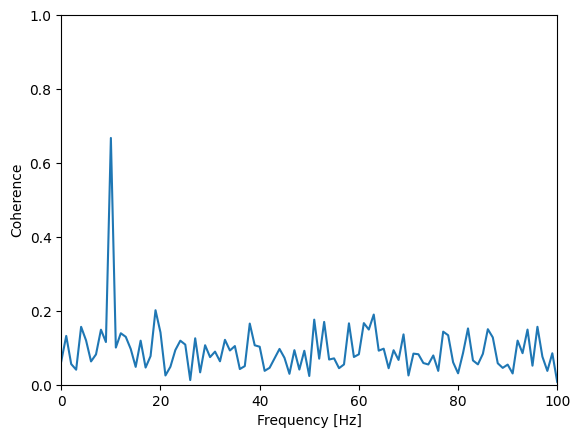

In [28]:
SYY = np.zeros(int(N/2+1))                                       # Variable to store field spectrum.
SNN = np.zeros(int(N/2+1))                                       # Variable to store spike spectrum.
SYN = np.zeros(int(N/2+1), dtype=complex)                        # Variable to store cross spectrum.

for k in np.arange(K):                                           # For each trial,
    yf = np.fft.rfft((y[k,:]-np.mean(y[k,:])) *np.hanning(N))    # Hanning taper the field,
    nf = np.fft.rfft((n[k,:]-np.mean(n[k,:])))                   # ... but do not taper the spikes.
    SYY = SYY + ( np.real( yf*np.conj(yf) ) )/K                  # Field spectrum
    SNN = SNN + ( np.real( nf*np.conj(nf) ) )/K                  # Spike spectrum
    SYN = SYN + (          yf*np.conj(nf)   )/K                  # Cross spectrum

cohr = np.abs(SYN) / np.sqrt(SYY) / np.sqrt(SNN)                 # Spike-field coherence
f = np.fft.rfftfreq(N, dt)                                       # Frequency axis for plotting

plt.plot(f,cohr)                             # Plot the result.
plt.xlim([0, 100])
plt.ylim([0, 1])
plt.xlabel('Frequency [Hz]')
plt.ylabel('Coherence');

Visualize the data. What rhythms do you observe?
There are positive peaks in data which reflect rhythmtic activity

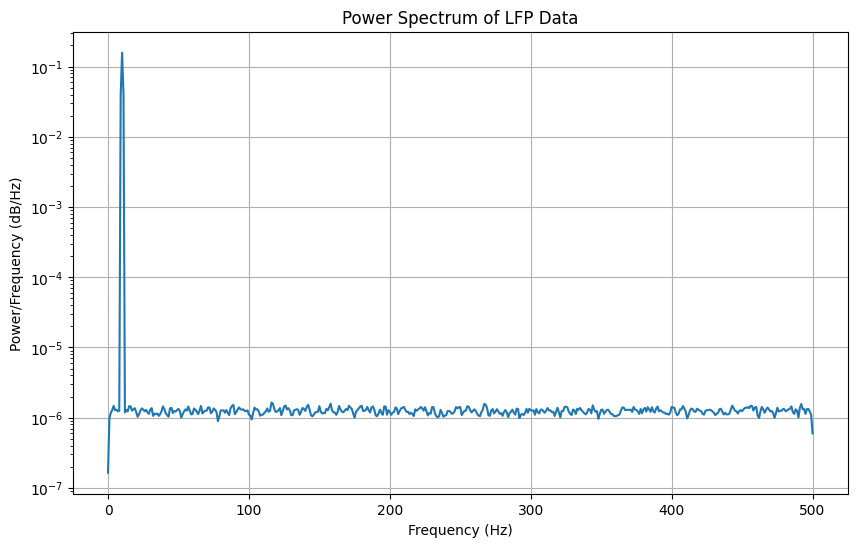

In [29]:
from scipy.signal import welch
frequencies, psd = welch(y, fs=1.0 / dt, nperseg=1024)

# Plot the spectrum
plt.figure(figsize=(10, 6))
plt.semilogy(frequencies, psd.mean(axis=0))
plt.title('Power Spectrum of LFP Data')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.grid(True)
plt.show()

Plot the spectrum versus frequency for these data. Are the dominant rhythms in the spectrum consistent with your visual inspection of the data?

They are, there are overall positive peaks with one very sharp positive peak.

Compute and display the spike-field coherence. Do you find evidence for spike-field coherence?

In [30]:
def coherence(n,y,t):                           #INPUT (spikes, fields, time)
    K = np.shape(n)[0]                          #... where spikes and fields are arrays [trials, time]
    N = np.shape(n)[1]
    T = t[-1]
    SYY = np.zeros(int(N/2+1))
    SNN = np.zeros(int(N/2+1))
    SYN = np.zeros(int(N/2+1), dtype=complex)
    
    for k in np.arange(K):
        yf = np.fft.rfft((y[k,:]-np.mean(y[k,:])) *np.hanning(N))    # Hanning taper the field,
        nf = np.fft.rfft((n[k,:]-np.mean(n[k,:])))                   # ... but do not taper the spikes.
        SYY = SYY + ( np.real( yf*np.conj(yf) ) )/K                  # Field spectrum
        SNN = SNN + ( np.real( nf*np.conj(nf) ) )/K                  # Spike spectrum
        SYN = SYN + (          yf*np.conj(nf)   )/K                  # Cross spectrum

    cohr = np.abs(SYN) / np.sqrt(SYY) / np.sqrt(SNN)                 # Coherence
    f = np.fft.rfftfreq(N, dt)                                       # Frequency axis for plotting
    
    return (cohr, f, SYY, SNN, SYN)

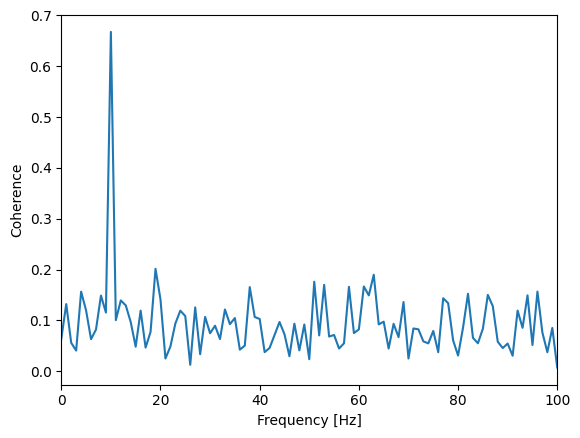

In [31]:
[cohr, f, SYY, SNN, SYN] = coherence(n,y,t)
plt.plot(f,cohr)
plt.xlim([0, 100]); plt.xlabel('Frequency [Hz]'); plt.ylabel('Coherence');

There isn't a lot of evidence of a strong spike-field coherence, there is a lot of contrast between the peaks. There is one peak with a strong coherence, but the other peaks are very weak.

Describe your results, as you would to a colleague or collaborator.


In your data, there is a strong synchronization between spikes and LFP at a frequency of about 10hz, the coherence value of 0.7 suggesting a pretty robust coupling. This could indidicate that neural activity is phase-locked around this specific frequency. There are smaller peaks at other frequencies throughout the rest of the data, who have coherence values of about 0.2 or less. This suggests weaker synchronization and does not suggest coupling at these frequencies. 

$\textbf{Question 2. }$

In [32]:
data2 = sio.loadmat('spikes-LFP-3.mat')       
y2 = data2['y']                              
n2 = data2['n']                              
t2 = data2['t'].reshape(-1)                  
K2 = np.shape(n2)[0]                         
N2 = np.shape(n2)[1]                         
dt2 = t2[1] - t2[0]

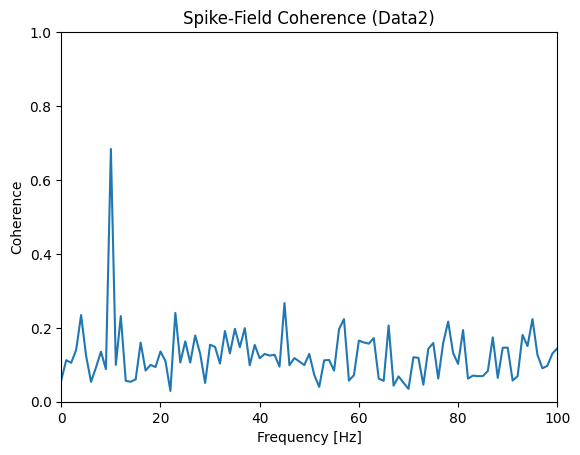

In [33]:
SYY2 = np.zeros(int(N2/2+1))
SNN2 = np.zeros(int(N2/2+1))
SYN2 = np.zeros(int(N2/2+1), dtype=complex)

# Compute spectra for the second set of data
for k in np.arange(K2):
    yf2 = np.fft.rfft((y2[k, :] - np.mean(y2[k, :])) * np.hanning(N2))
    nf2 = np.fft.rfft((n2[k, :] - np.mean(n2[k, :])))
    SYY2 = SYY2 + (np.real(yf2 * np.conj(yf2))) / K2
    SNN2 = SNN2 + (np.real(nf2 * np.conj(nf2))) / K2
    SYN2 = SYN2 + (yf2 * np.conj(nf2)) / K2

# Compute spike-field coherence for the second set of data
cohr2 = np.abs(SYN2) / np.sqrt(SYY2) / np.sqrt(SNN2)

# Frequency axis for plotting
f2 = np.fft.rfftfreq(N2, dt2)

# Plot the result for the second set of data
plt.plot(f2, cohr2)
plt.xlim([0, 100])
plt.ylim([0, 1])
plt.xlabel('Frequency [Hz]')
plt.ylabel('Coherence')
plt.title('Spike-Field Coherence (Data2)')
plt.show()

Visualize the data. What rhythms do you observe?

The coherence reveals a peak near 15ish Hz. This peak is the only rhythm that is coherent across trials. looks a lot like the previous graph...

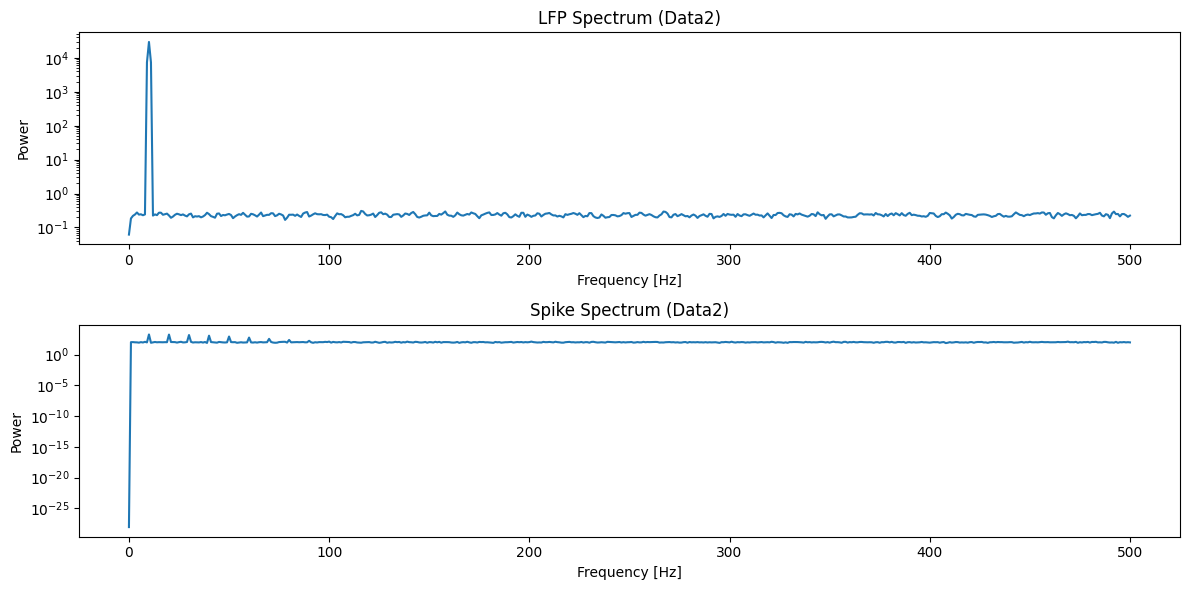

In [34]:
SYY2 = np.zeros(int(N2/2+1))
SNN2 = np.zeros(int(N2/2+1))

# Compute spectra for the second set of data
for k in np.arange(K2):
    yf2 = np.fft.rfft((y2[k, :] - np.mean(y2[k, :])) * np.hanning(N2))
    nf2 = np.fft.rfft((n2[k, :] - np.mean(n2[k, :])))
    SYY2 = SYY2 + (np.real(yf2 * np.conj(yf2))) / K2
    SNN2 = SNN2 + (np.real(nf2 * np.conj(nf2))) / K2

# Frequency axis for plotting
f2 = np.fft.rfftfreq(N2, dt2)

# Plot the spectra for the second set of data
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.semilogy(f2, SYY2)
plt.title('LFP Spectrum (Data2)')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power')

plt.subplot(2, 1, 2)
plt.semilogy(f2, SNN2)
plt.title('Spike Spectrum (Data2)')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power')

plt.tight_layout()
plt.show()

Plot the spectrum versus frequency for these data. Are the dominant rhythms in the spectrum consistent with your visual inspection of the data?

It appears that the dominant rhythm in the spectrum is consistent with my previous visual inspection of the data.

Compute and display the spike-field coherence. Do you find evidence for spike-field coherence?

Text(0, 0.5, 'Coherence')

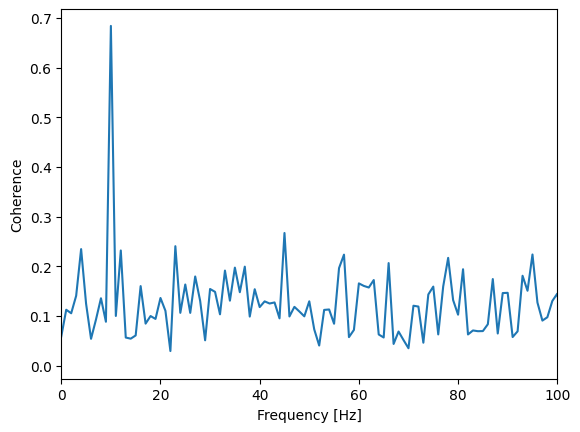

In [35]:
def coherence2(n2, y2, t2):                          # INPUT (spikes, fields, time)
    K2 = np.shape(n2)[0]                             # ... where spikes and fields are arrays [trials, time]
    N2 = np.shape(n2)[1]
    T2 = t2[-1]
    SYY2 = np.zeros(int(N2/2+1))
    SNN2 = np.zeros(int(N2/2+1))
    SYN2 = np.zeros(int(N2/2+1), dtype=complex)
    
    for k in np.arange(K2):
        yf2 = np.fft.rfft((y2[k, :] - np.mean(y2[k, :])) * np.hanning(N2))    # Hanning taper the field,
        nf2 = np.fft.rfft((n2[k, :] - np.mean(n2[k, :])))                      # ... but do not taper the spikes.
        SYY2 = SYY2 + (np.real(yf2 * np.conj(yf2))) / K2                      # Field spectrum
        SNN2 = SNN2 + (np.real(nf2 * np.conj(nf2))) / K2                      # Spike spectrum
        SYN2 = SYN2 + (yf2 * np.conj(nf2)) / K2                                # Cross spectrum

    cohr2 = np.abs(SYN2) / np.sqrt(SYY2) / np.sqrt(SNN2)                       # Coherence
    f2 = np.fft.rfftfreq(N2, dt2)                                              # Frequency axis for plotting
    
    return cohr2, f2, SYY2, SNN2, SYN2

[cohr2, f2, SYY2, SNN2, SYN2] = coherence2(n2, y2, t2)
plt.plot(f2, cohr2)
plt.xlim([0, 100])
plt.xlabel('Frequency [Hz]')
plt.ylabel('Coherence')


Is there evidence of spike-field coherence?

There is a strong correlation that occurs around 15 Hz, with all the other coherence peaks being < 3 Hz. This isn't really good evidence for a very strong spike-field coherence.

Describe your results, as you would to a colelague or collaborator.

In your data, there is a strong synchronization between spikes and LFP at a frequency around 15hz. The coherence value for this spike is 0.7, which is relatively robust and suggests coupling. There smaller peaks throughout the data, which all have coherence values of around 0.3 or less. These are weaker in synchronization and suggests no coupling.

$\textbf{Question 3. }$

In [36]:
# Set parameters
num_trials = 100
N = 1000  # Number of data points in 1 s
dt = 1/1000  # Sampling interval 0.001 s
t = np.arange(N) * dt

# Initialize arrays to store data
spike_data = np.zeros((num_trials, N))
field_data = np.zeros((num_trials, N))

# Simulate 100 trials
for trial in range(num_trials):
    # Simulate spike data for one trial
    m = 1
    p = 0.01
    spike_data[trial, :] = np.random.binomial(m, p, N)

    # Simulate sinusoidal field + noise for one trial
    field_data[trial, :] = np.sin(2.0 * np.pi * t * 10) + 0.1 * np.random.randn(N)

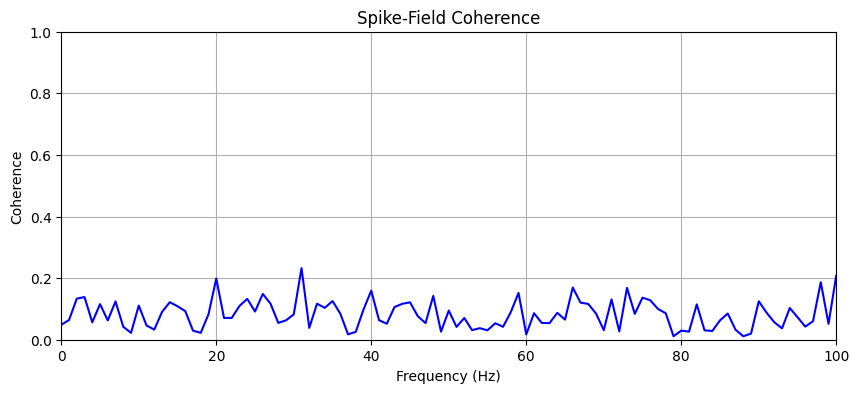

In [37]:
# Set parameters
num_trials3 = 100
N3 = 1000  # Number of data points in 1 s
dt3 = 1/1000  # Sampling interval 0.001 s
t3 = np.arange(N3) * dt3

# Initialize arrays to store data
spike_data3 = np.zeros((num_trials3, N3))
field_data3 = np.zeros((num_trials3, N3))

# Simulate 100 trials
for trial3 in range(num_trials3):
    # Simulate spike data for one trial
    m3 = 1
    p3 = 0.01
    spike_data3[trial3, :] = np.random.binomial(m3, p3, N3)

    # Simulate sinusoidal field + noise for one trial
    field_data3[trial3, :] = np.sin(2.0 * np.pi * t3 * 10) + 0.1 * np.random.randn(N3)

# Calculate spike-field coherence
SYY3 = np.zeros(int(N3/2+1))
SNN3 = np.zeros(int(N3/2+1))
SYN3 = np.zeros(int(N3/2+1), dtype=complex)

for trial3 in range(num_trials3):
    yf3 = np.fft.rfft((field_data3[trial3, :] - np.mean(field_data3[trial3, :])) * np.hanning(N3))
    nf3 = np.fft.rfft((spike_data3[trial3, :] - np.mean(spike_data3[trial3, :])))
    SYY3 = SYY3 + (np.real(yf3 * np.conj(yf3))) / num_trials3
    SNN3 = SNN3 + (np.real(nf3 * np.conj(nf3))) / num_trials3
    SYN3 = SYN3 + (yf3 * np.conj(nf3)) / num_trials3

cohr3 = np.abs(SYN3) / np.sqrt(SYY3) / np.sqrt(SNN3)
frequencies3 = np.fft.rfftfreq(N3, dt3)

# Plot spike-field coherence
plt.figure(figsize=(10, 4))
plt.plot(frequencies3, cohr3, color='blue')
plt.title('Spike-Field Coherence')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Coherence')
plt.grid(True)
plt.xlim([0, 100])
plt.ylim([0, 1])
plt.show()

Visualize the data. What rhythms do you observe? Do you detect associations between the LFP and spikes?

Visualizing the data above,there doesn't appear to be any coherence or associations between the LFP and spikes.

Plot the spectrum versus frequency for these data. Are the dominant rhythms in the spectrum consistent with your visual inspection of the data?

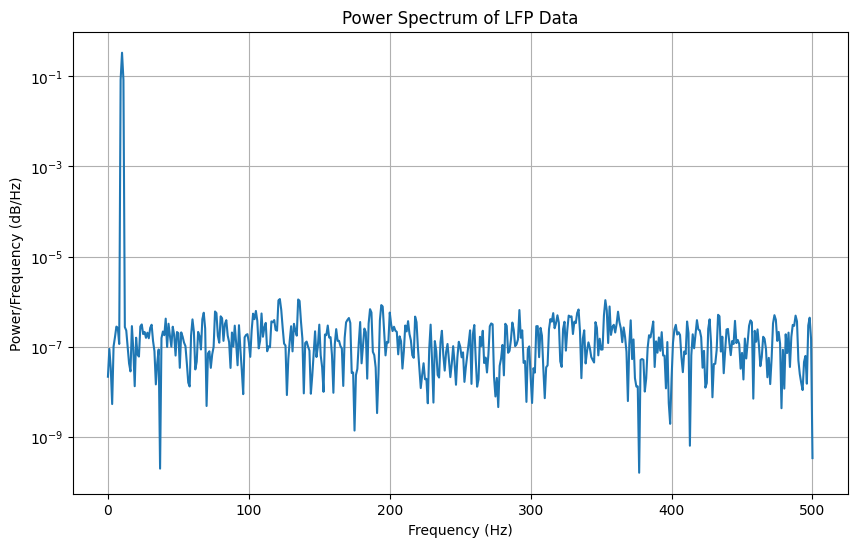

In [38]:
frequencies_lfp, psd_lfp = welch(field_data3.mean(axis=0), fs=1.0 / dt3, nperseg=1024)

# Plot the power spectrum of LFP data
plt.figure(figsize=(10, 6))
plt.semilogy(frequencies_lfp, psd_lfp)
plt.title('Power Spectrum of LFP Data')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.grid(True)
plt.show()

There are not consistent with my initial visualization - there is now a spike somewhere between 0 and 50 Hz.

Compute and display the spike-field coherence. Do you find evidence for spike-field coherence?

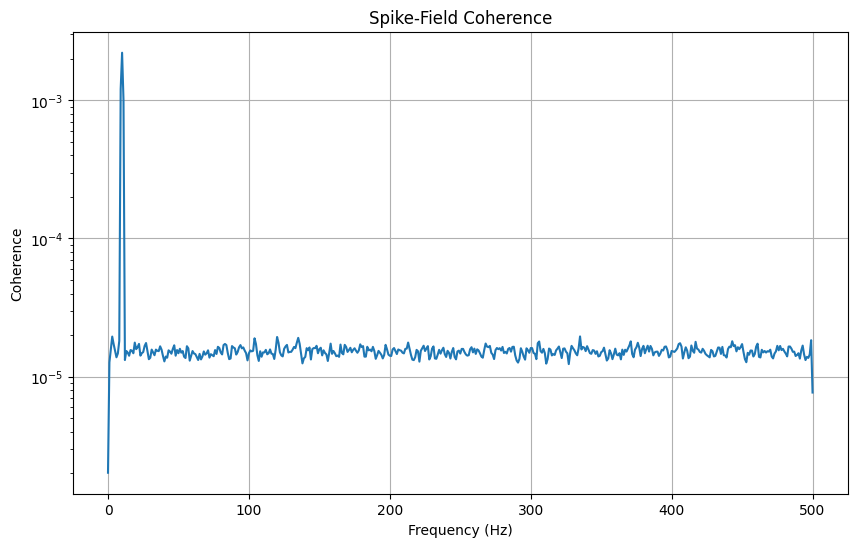

In [39]:
# Compute spike-field coherence
frequencies, coherence_values = csd(spike_data, field_data, fs=1.0 / dt, nperseg=1024)

# Plot the spike-field coherence
plt.figure(figsize=(10, 6))
plt.semilogy(frequencies, np.abs(coherence_values).mean(axis=0))
plt.title('Spike-Field Coherence')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Coherence')
plt.grid(True)
plt.show()

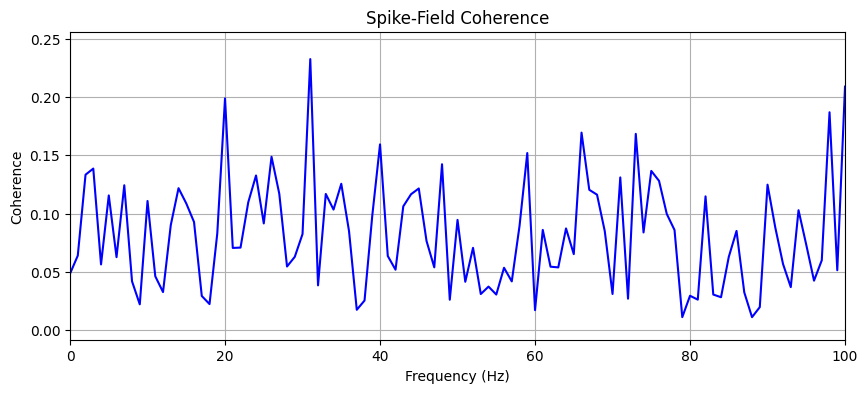

In [40]:
def coherence(n, y, t):  # INPUT (spikes, fields, time)
    K = np.shape(n)[0]  # ... where spikes and fields are arrays [trials, time]
    N = np.shape(n)[1]
    T = t[-1]
    SYY = np.zeros(int(N/2+1))
    SNN = np.zeros(int(N/2+1))
    SYN = np.zeros(int(N/2+1), dtype=complex)

    for k in np.arange(K):
        yf = np.fft.rfft((y[k, :] - np.mean(y[k, :])) * np.hanning(N))  # Hanning taper the field,
        nf = np.fft.rfft((n[k, :] - np.mean(n[k, :])))  # ... but do not taper the spikes.
        SYY = SYY + (np.real(yf * np.conj(yf))) / K  # Field spectrum
        SNN = SNN + (np.real(nf * np.conj(nf))) / K  # Spike spectrum
        SYN = SYN + (yf * np.conj(nf)) / K  # Cross spectrum

    cohr = np.abs(SYN) / np.sqrt(SYY) / np.sqrt(SNN)  # Coherence
    f = np.fft.rfftfreq(N, dt)  # Frequency axis for plotting

    return cohr, f, SYY, SNN, SYN

# Assuming you have the data loaded in 'spike_data' and 'field_data'
n3 = spike_data3
y3 = field_data3
t3 = np.arange(N3) * dt3

# Calculate coherence using the provided function
cohr3, f3, SYY3, SNN3, SYN3 = coherence(n3, y3, t3)

# Plot the coherence
plt.figure(figsize=(10, 4))
plt.plot(f3, cohr3, color='blue')
plt.title('Spike-Field Coherence')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Coherence')
plt.grid(True)
plt.xlim([0, 100])
plt.show()

There is not a lot of evidence of a spike field coherence.

Describe your results, as you would to a colleague or collaborator.

There is not strong spike field coherence within this data set. The highest points of coherence for this data is beneath 0.20 - indicating that all coherence events are very weak. This suggests very little coupling within our data between the spike data and LFP data.

Do the results of each method match your expectations? In particular, do you expect to observe spike-field coherence between these simulated data?

Not every method resulted in a graph that matched my expectations.

I did not expect to see spike field coherence within the simulated data. The spikes were generated using a binomial distribution with a low probability of a spike - meaning that spikes are relatively rare events. This low probability makes it less likely that there will be significant coherence between the simulated spikes and LFP data. 